In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime

In [2]:
df = pd.read_excel("marketing_campaign1.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [3]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [7]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


In [8]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [10]:
df['Income'].fillna(df['Income'].mean(), inplace = True)

# .fillna(..., inplace=True) replaces NaN(not a number) values directly in the DataFrame
# without creating a new copy.

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
# df['Days_Customer'] = df['Days_Customer'].dt.days.astype('int16')

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
# Dropping useless columns
df.drop(['ID','Z_CostContact','Z_Revenue','Year_Birth','Dt_Customer'], axis=1, inplace=True)

In [16]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # List of numerical columns
# cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# # Boxplot
# plt.figure(figsize=(8, 6))
# sns.boxplot(data=df[cols])
# plt.title('Boxplot of Purchases')
# plt.ylabel('Number of Purchases')
# plt.show()

In [17]:
num_cols = df.select_dtypes(include=['number']).columns
print(num_cols)

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [18]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['Education', 'Marital_Status'], dtype='object')


In [19]:
cat_cols = [col for col in df.columns if df[col].nunique() < 10]  # Adjust threshold as needed

In [20]:
df.dtypes           #FIND EVERY COLUMNS DATATYPE

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

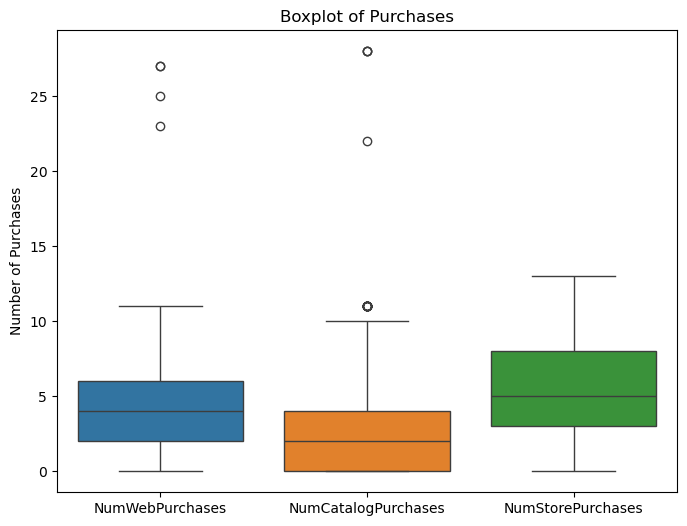

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[cols])
plt.title('Boxplot of Purchases')
plt.ylabel('Number of Purchases')
plt.show()

In [22]:
import pandas as pd

def remove_outliers_iqr(df, cols):
    """Removes outliers from specified columns using the IQR method."""
    df_clean = df.copy()
    for col in cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

<Figure size 640x480 with 0 Axes>

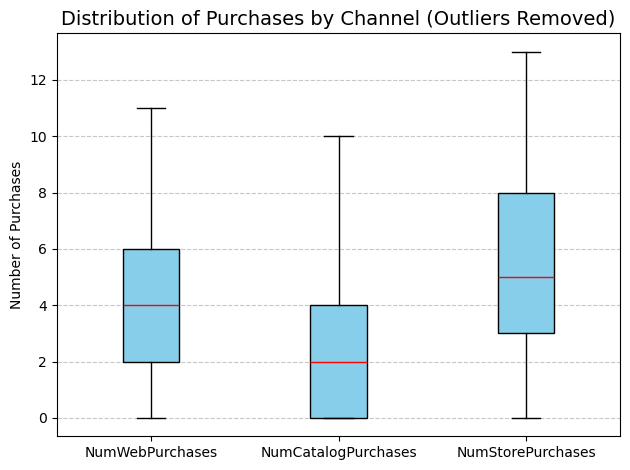

In [23]:
cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Remove outliers
df_no_outliers = remove_outliers_iqr(df, cols)


plt.figure(figsize=(8, 6), dpi=80)
df_no_outliers[cols].plot(kind='box', patch_artist=True,
                          boxprops=dict(facecolor='skyblue', color='black'),
                          medianprops=dict(color='red'),
                          whiskerprops=dict(color='black'),
                          capprops=dict(color='black'),
                          flierprops=dict(marker='o', markerfacecolor='gray', markeredgecolor='gray'))

plt.title('Distribution of Purchases by Channel (Outliers Removed)', fontsize=14)
plt.ylabel('Number of Purchases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

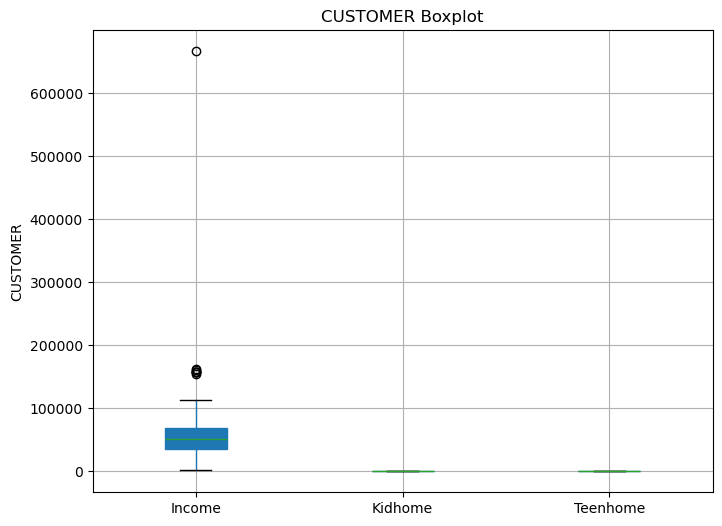

In [24]:
column=['Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome']

plt.figure(figsize=(8,6))
df[column].boxplot(patch_artist=True)
plt.title('CUSTOMER Boxplot')
plt.ylabel('CUSTOMER')
plt.show()


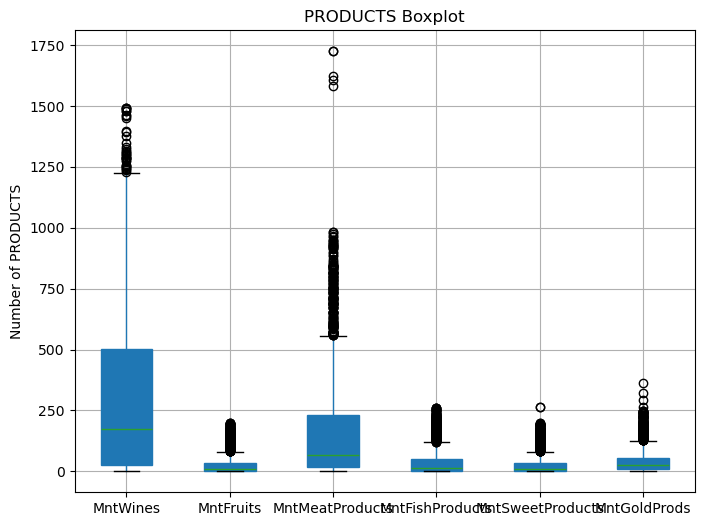

In [25]:
col2=['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

plt.figure(figsize=(8,6))
df[col2].boxplot(patch_artist=True)
plt.title('PRODUCTS Boxplot')
plt.ylabel('Number of PRODUCTS')
plt.show()

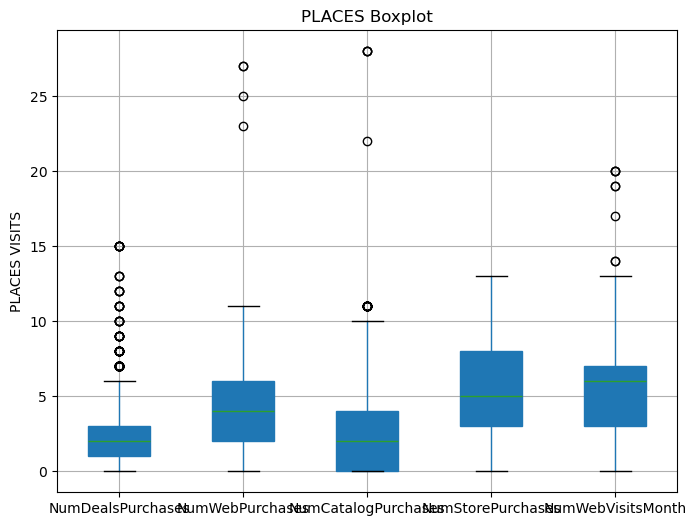

In [26]:
col3=[ 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       ]

plt.figure(figsize=(8,6))
df[col3].boxplot(patch_artist=True)
plt.title('PLACES Boxplot')
plt.ylabel('PLACES VISITS')
plt.show()

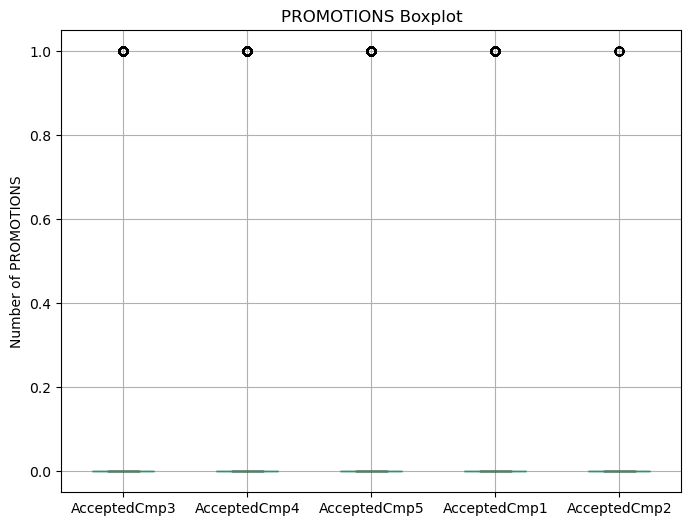

In [27]:
col4=['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2']

plt.figure(figsize=(8,6))
df[col4].boxplot(patch_artist=True)
plt.title('PROMOTIONS Boxplot')
plt.ylabel('Number of PROMOTIONS')          #FOR X LABEL COLUMNS
plt.show()


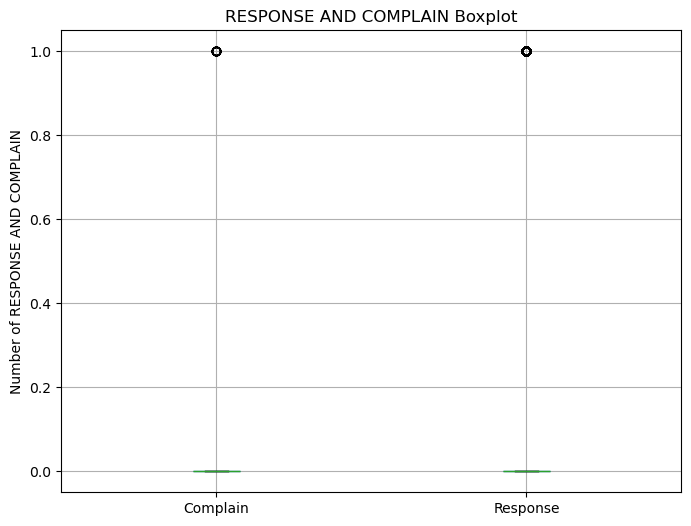

In [28]:
col5=['Complain','Response']

plt.figure(figsize=(8,6))
df[col5].boxplot(patch_artist=True)
plt.title('RESPONSE AND COMPLAIN Boxplot')
plt.ylabel('Number of RESPONSE AND COMPLAIN')          #FOR X LABEL COLUMNS
plt.show()


In [29]:
import numpy as np

In [30]:
df['Education'].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [31]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [32]:
unique_number = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_number.append(x)

pd.DataFrame(unique_number, index = df.columns, columns = ["Total Unique Values"])

,Total Unique Values
Education,5
Marital_Status,8
Income,1975
Kidhome,3
Teenhome,3
Recency,100
MntWines,776
MntFruits,158
MntMeatProducts,558
MntFishProducts,182


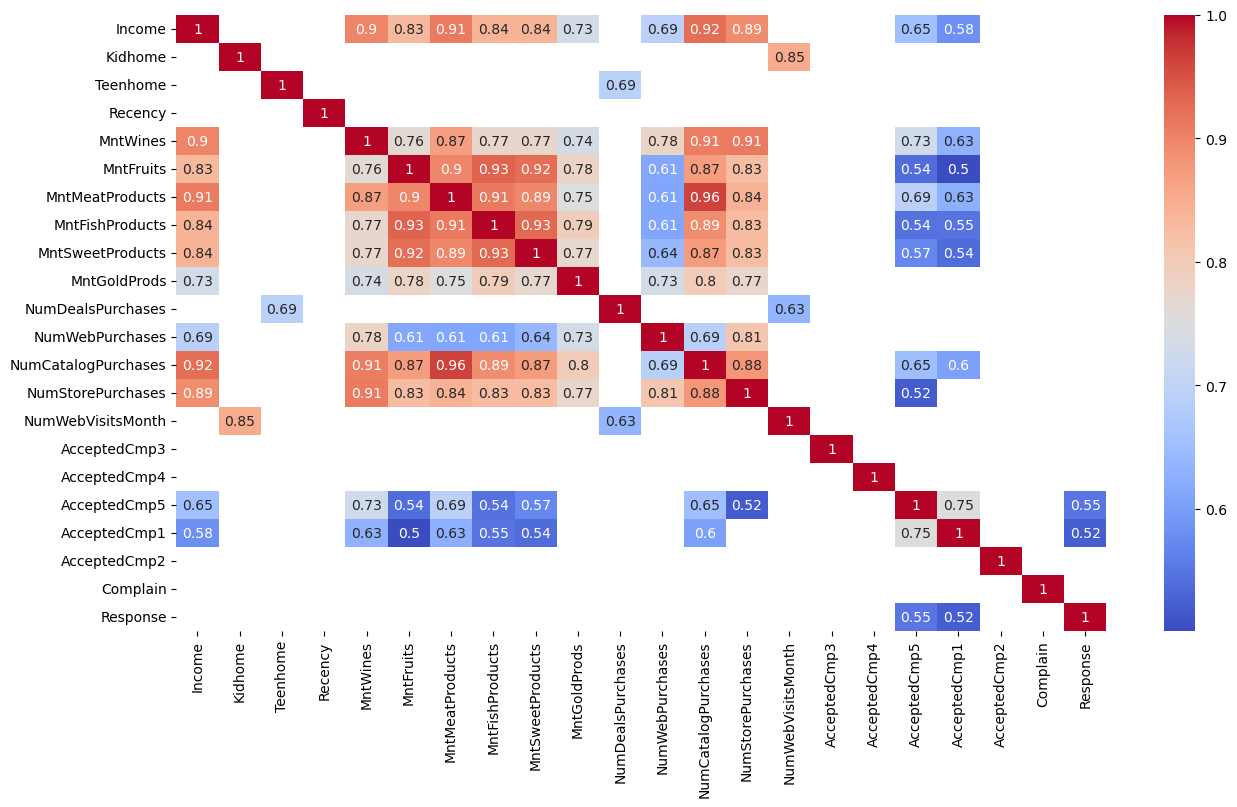

In [33]:
corr = df.select_dtypes(include=['number']).corr()

corr = corr.corr()
plt.figure(figsize = (15,8))
sns.heatmap(data = corr[corr>0.5], annot = True, cmap = 'coolwarm')
plt.show()

# POSITIVE CORRELATION

In [34]:
# figsize=(12,6)
# df.hist()

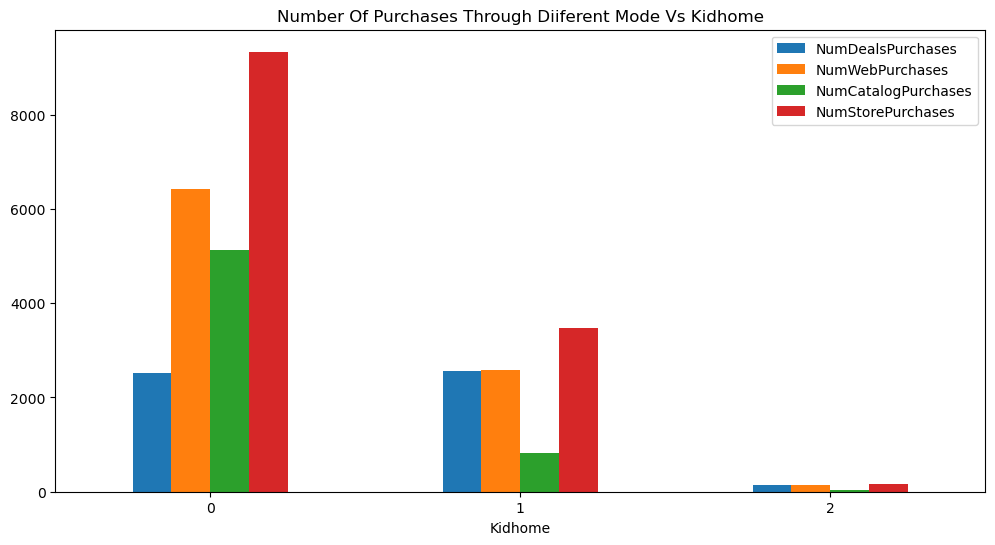

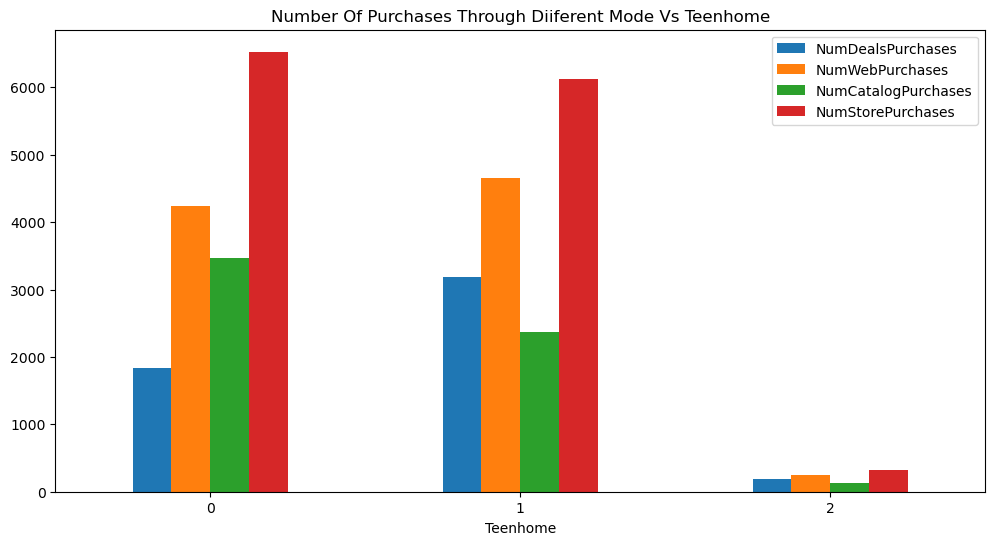

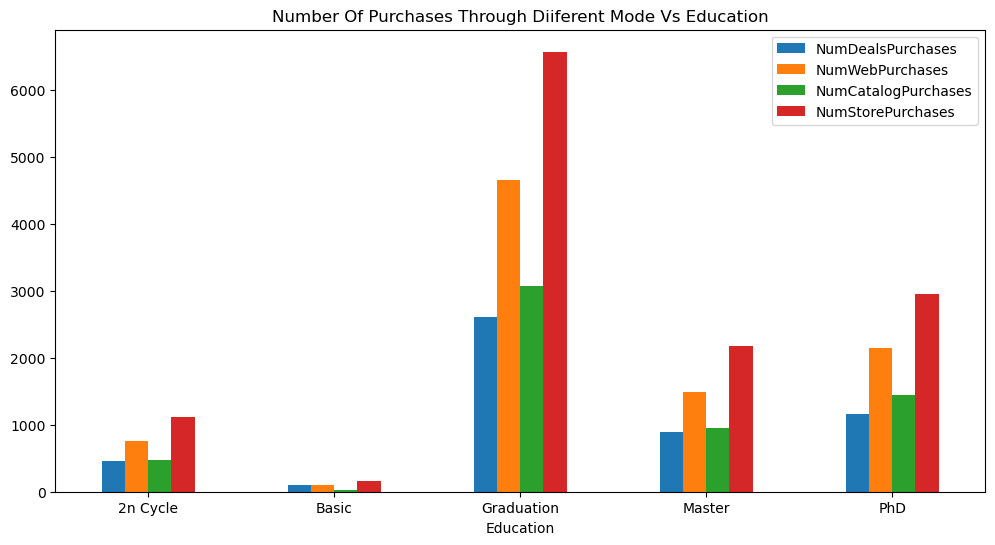

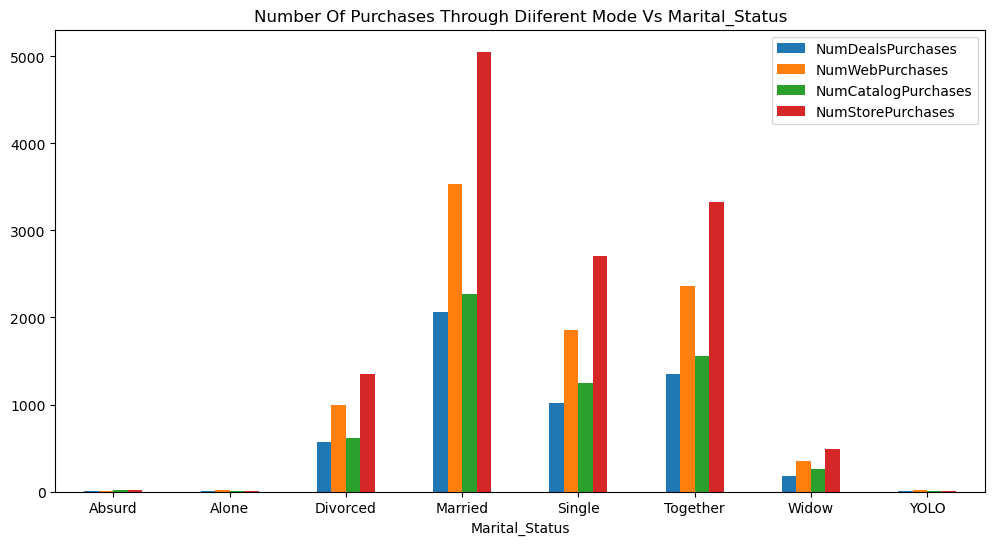

In [35]:
for col in ['Kidhome','Teenhome','Education','Marital_Status']:
    df.groupby(col)[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum().plot(kind='bar',figsize = (12, 6))
    plt.title('Number Of Purchases Through Diiferent Mode Vs '+col)
    plt.xticks(rotation = 360)
    plt.show()

# plt.title('Number Of Purchases Through Diiferent Mode Vs '+col)
# gives different plots with changing their names in the title as updating

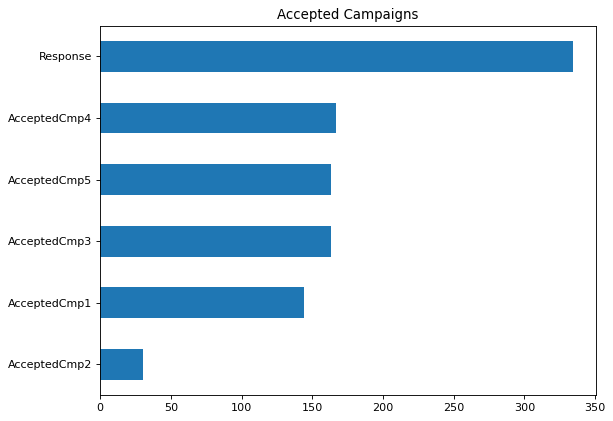

In [36]:
plt.figure(figsize = (8, 6), dpi = 80)
df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5', 'Response']].sum().sort_values(ascending=True).plot(kind='barh')
plt.title('Accepted Campaigns')
plt.show()

In [37]:
# PEOPLE BOUGHT MOSTLY FROM LAST CAMPAIGNS RATHER THAN FIRST

SyntaxError: invalid syntax (3572819460.py, line 1)

In [ ]:
# DENSITY PLOT

In [ ]:
for col in num_cols :
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df[col], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)

    plt.title(col + ' Distribution')
    plt.ylabel("density")

    plt.tight_layout()
    plt.show()

In [ ]:
#INCOME IS MOSTLY FROM 0 TO 1,00000
#KIDHOME IS MOSTLY 1 TO 2
#TEEN HOME IS ALSO MOSLTY 1 TO 2
#RECENCY DIFFERS BETWEEN -20 TO 100
#WINES AND MEAT ARE BOUGHT MORE COMPARED TO OTHERS
#WEB AND STORE PURCHASES ARE MORE
#ACCEPTED CAMPAIGNS ARE HIGH IN 2
#AND COMPLAINS ARE ALSO MORE

In [ ]:
#PIE PLOT

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each category
customer_counts = df['Education'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'])
plt.title('Education Distribution')
plt.show()


# df['Education'].value_counts()  : THIS WILL HELP CONVERT CATEGORICAL TO NULMERICAL

In [ ]:
#GRADUATED PEOPLE ARE MORE

In [ ]:
customer_counts = df['Marital_Status'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'])
plt.title('MARITAL Distribution')
plt.show()

In [ ]:
#MARRIED PEOPLE ARE MORE FOLLOWED BY TOGETHER AND SINGLE

In [ ]:
# for col in cols :
#     plt.figure(figsize = (8, 6))
#     category_counts = df[cols].value_counts()
#     plt.pie( category_counts, labels= category_counts.index , autopct='%1.1f%%',colors=['skyblue', 'lightcoral', 'gold', 'lightgreen'])

#     plt.title(col + ' Distribution')
#     plt.ylabel("density")

#     plt.tight_layout()
#     plt.show()


In [ ]:
cat_axis_names = ['Age Group','Education Level','Education Level','Number Of Kids At Houseold','Number Of Teens At Houseold','Total Number of Kids & Children At Household','Response To Campaign1','Response To Campaign2','Response To Campaign3','Response To Campaign4','Response To Campaign5','Response To Last Campaign','Total Responce To Campaigns','Complaints In Last 2 Years','Has Partner Or Not','Maritial Status','Number Of Years Since Enrollment','Year joined','Month Joined','Day Joined']

for col, name in list(zip(cat_cols, cat_axis_names)):
    fig, ax = plt.subplots(figsize = (8, 6))

    observation_values = list(df[col].value_counts().index)         #UNIQUE CATEGORICAL VALUES AND THEIR COUNT
    total_observation_values = list(df[col].value_counts())

    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.title((col + "(" + name + ")")) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

In [ ]:
print(df['Education'].apply(type).unique())

In [ ]:
import pandas as pd

# Check the inferred data type of a column
dtype_info = pd.api.types.infer_dtype(df['Education'])
print(dtype_info)


In [ ]:
df_counts = df["AcceptedCmp3"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(df_counts, labels=df_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart for AcceptedCmp3")
plt.show()


In [ ]:
#PIE PLOT FOR NUMERICAL COLUMNS

In [ ]:
# numeric_columns = df.select_dtypes(include=['number']).columns

# for col in numeric_columns:
#     plt.figure(figsize=(6, 6))
#     plt.pie(df[col], labels=df.index, autopct='%1.1f%%')
#     plt.title(f'Pie Chart for {col}')
#     plt.show()

In [ ]:
for col in ['Kidhome','Teenhome','Education','Marital_Status']:
    df.groupby(col)[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']].sum().sort_values(by='Response', ascending=False).plot(kind='bar',figsize = (12, 6))
    plt.title('Different Campaigns Accepted Vs '+col)
    plt.xticks(rotation = 360)

    plt.show()

In [ ]:
#Most amount of money is spent on wine and meat by customers and minimum on fruits and sweets
#Majority of customers like to purchase through store
#The chances of accepting an offer in campaign increases with the number of campaigns, maximum amount of customers accepted the last campaign offer

In [ ]:
#MODEL : DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is a clustering algorithm that groups together points that are closely packed together while marking outliers as noise.¶

In [ ]:
#IT IS AN Unsupervised machine Learning algorithm
#THIS MODEL REMOVES NOISE FROM CLUSTERS
#WE ONLY CLUSTER CORE, NOISE IS CONVERTED TO BORDER POINTS
#ANYTHING LESS THAN CIRCLE RADIUS FORMS THE CLUSTERS LIKE BELOW 1.9 OR ELSE IF THEY ARE ABOVE THEY WILL BE DISCARDED

In [ ]:
sns.pairplot(df[['Income', 'MntWines', 'MntMeatProducts','MntFruits'
                ]])

# Check whether natural clusters exist before tuning:

In [ ]:
sns.pairplot(df[['MntFishProducts', 'MntSweetProducts','MntGoldProds'
                ]])

In [ ]:
sns.pairplot(df[['NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'
                ]])

In [ ]:
sns.pairplot(df[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'
                ]])

In [ ]:
#MODEL BUILDING¶

In [ ]:
#DBSCAN (Density-Based Spatial Clustering of Applications with Noise). DBSCAN is a clustering algorithm that groups together points that are closely packed together while marking outliers as noise.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler

In [ ]:

le = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col] = le.fit_transform(df[col])


In [ ]:
df_scaled = StandardScaler().fit_transform(df[['Income', 'MntWines', 'MntMeatProducts',
                                              'MntFruits','MntFishProducts',
    'MntSweetProducts','MntGoldProds'  ]])


if isinstance(df_scaled, np.ndarray):     # checking if df_scaled is numpy array, if it is convert them into pandas df
    df_scaled = pd.DataFrame(df_scaled, columns=['Income', 'MntWines', 'MntMeatProducts',
                                              'MntFruits','MntFishProducts',
    'MntSweetProducts','MntGoldProds'])

x = df_scaled.loc[:, ['Income', 'MntWines', 'MntMeatProducts',
                                              'MntFruits','MntFishProducts',
    'MntSweetProducts','MntGoldProds']].values

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_scaled)

In [ ]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=7,min_samples=2,metric='manhattan')

# Use Manhattan if your features are independent or the space is sparse
# (which often happens with encoded data or skewed distributions).

In [ ]:
# eps=7: Defines the maximum distance between two points or max radius
# min_samples=2: Determines the minimum number of points required to form a dense region (core point).
# metric='manhattan': Specifies that the manhattan distance will be used to measure the distance between points. Other metrics like Manhattan or
# cosine can be used depending on the data.

In [ ]:
model2=model.fit(x)
model2

In [ ]:
import numpy as np
unique_labels = np.unique(model2.labels_)
print(unique_labels)

# If all are -1, DBSCAN isn't detecting dense clusters

In [ ]:
label=model2.labels_
label

# locate noise usually -1

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['MntWines'], df['Income'], c=model.labels_)
plt.show()


In [ ]:
import numpy as np
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)   #np.zeros_like(label, dtype=bool):Creates a new NumPy array of the same shape as label.
sample_cores

# optimal clusters are formed by removing Outliers(False)

In [ ]:
from sklearn import metrics
sample_cores[model.core_sample_indices_]= True    #indices (positions) in dataset that DBSCAN classified as core points—those with enough neighbors (≥ min_samples) within eps distance.
sample_cores

In [ ]:
n_clusters=len(set(label))-(1 if -1 in label else 0)     #subtracts 1 from the count only if -1(noise) is in the set of labels.
print("Optimal number of clusters",n_clusters)

In [ ]:
y_means = model.fit_predict(x)

plt.figure(figsize=(8,6))
plt.xlabel('Income')
plt.ylabel('spending')
plt.title('DBSCAN  Cluster (2 clusters)')
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=60, c='blue', label='Cluster 2')

plt.legend()
plt.show()

In [ ]:
# dbscan = DBSCAN(eps=2, min_samples=5)

# dbscan_labels = dbscan.fit_predict(x)

# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=dbscan_labels, palette='tab10')
# plt.xlabel('Income')
# plt.ylabel('spending')
# plt.title('DBSCAN  Cluster (2 clusters)')
# plt.legend()
# plt.show()

In [ ]:
from sklearn import metrics
print(metrics.silhouette_score(x,label))

# THE silhouette_score IS HIGH WHEN THERE IS ONLY ONE CLUSTER AND LOW WHEN THERE IS MORE
# CHANGE THIS BY DECREASING NSAMPLE TO 4 AND INCREASING EPS NUMBER TO 3

In [ ]:
SINCE THE silhouette_score IS ABOVE 0.5, WE ARE GETTING MEANINGFUL CLUSTERS.

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label, cmap='viridis')

In [ ]:
df_scaled['Cluster'] = label

cluster_profiles = df_scaled.groupby('Cluster').mean(numeric_only=True)
print(cluster_profiles)

In [ ]:
df_scaled['Cluster'].value_counts()

In [ ]:
import matplotlib.pyplot as plt

cluster_profiles.T.plot(kind='bar', figsize=(14, 6))   #cluster_profiles.T
# .T transposes the DataFrame: rows become columns and vice versa.
# Originally, clusters are rows and features are columns. which is needed for grouped bar plot
# in X AXIS WE HAVE FEATURES, AND BAR REPRESENTS CLUSTER


plt.title("Feature Comparison Across Clusters")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot the transposed cluster profiles
cluster_profiles.T.plot(kind='bar', figsize=(14, 6))

# Modify legend labels
plt.legend(title="Customer Segmentation", labels=["Luxury Sweet Spot Customers", "Moderate and Balanced Shoppers", "Meat-Driven High Spenders"])

plt.title("Feature Comparison Across Clusters")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
df_scaled.groupby('Cluster').mean()

In [ ]:
cluster_names = {
    -1: "Luxury Sweet Spot Customers",
     0: "Moderate and Balanced Shoppers",
     1: "Meat-Driven High Spenders"
}
df_scaled['ClusterName'] = df_scaled['Cluster'].map(cluster_names)

# .map(cluster_names): Replaces numeric labels with their corresponding descriptive names.

In [ ]:
valuable_customers = df_scaled[df_scaled['ClusterName'] == "Luxury Sweet Spot Customers"]
valuable_customers.head()

In [ ]:
valuable_customers.to_csv("valuable_customers.csv", index=False)

# The index=False ensures the row numbers (index column) aren't included in the file—nice and clean for delivery, analysis,
# or sharing with your team.

In [ ]:
valuable_customers.describe()

In [ ]:
INFERENCES
Cluster -1 → Luxury Sweet Spot Customers
Extremely high on: Income, MntSweetProducts, MntGoldProds

Despite low values in wines, meats, and fruits, these customers splurge on sweets and gold.

Interpretation: Likely wealthy customers with niche preferences—value indulgent items.
Cluster 0 → Moderate and Balanced Shoppers
Features are around zero (mean of population) across the board.

No standout highs or lows.

Interpretation: Steady, middle-tier customers—neither high spenders nor minimalists.
Cluster 1 → Meat-Driven High Spenders
Huge spike in MntMeatProducts (6.58 std deviations above mean!).

Above-average income too.

Low on sweets, gold, and other categories.
Interpretation: Focused, protein-heavy spenders—perhaps families or bulk shoppers.

In [ ]:
model1_pickle - u can give any name u want in the format name_pickle pickle.dump(model, f) - here in place of model use ur variable name of model u used like

from sklearn.cluster import DBSCAN
model=DBSCAN(eps=7,min_samples=2,metric='manhattan') <<<like this

In [ ]:
import pickle

# Replace `kmeans` with your actual model variable name
with open("segmentation_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
!pip install streamlit

In [ ]:

%% writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle

st.set_page_config(page_title="Customer Segmentation", layout="centered")

st.title("🎯 Customer Segmentation App")

# Load model
@st.cache_resource
def load_model():
    with open("segmentation_model.pkl", "rb") as f:
        return pickle.load(f)

model = load_model()

# Load dataset
@st.cache_data
def load_data():
    return pd.read_excel("marketing_campaign1.xlsx")

df = load_data()

# Display data preview
st.subheader("📊 Preview of Data")
st.dataframe(df.head())

# Input features for prediction
st.sidebar.header("🔍 Input Customer Details")
try:
    income = st.sidebar.slider("Income", min_value=0, max_value=200000, value=50000, step=1000)
    age = st.sidebar.slider("Age", min_value=18, max_value=100, value=35)
    score = st.sidebar.slider("Spending Score", min_value=1, max_value=100, value=50)

    input_data = np.array([[income, age, score]])

    if st.sidebar.button("Predict Segment"):
        prediction = model.predict(input_data)
        st.success(f"🎯 Predicted Segment: {int(prediction[0])}")
except Exception as e:
    st.error(f"Error in prediction: {e}")

In [ ]:
%% writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
openpyxl



In [ ]:
!pip install -r requirements.txt
!streamlit run app.py

In [ ]:
# Import libraries
from sklearn.cluster import KMeans
import pandas as pd

# Load and prepare your dataset
df = pd.read_csv("valuable_customers.csv")  # replace with your actual file

# Feature selection (adjust as per your features)
X = df[["Income", "Age", "Spending Score"]]  # example features

# Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Predict new segment for user input from Streamlit
# Example new input (replace with actual Streamlit slider values)
new_data = pd.DataFrame([[50000, 35, 50]], columns=["Income", "Age", "Spending Score"])
prediction = kmeans.predict(new_data)

# Output the segment
st.write(f"Predicted Customer Segment: {prediction[0]}")
